# MYBLOOD BOOK_PROJECT

In [100]:
#Load the required models and import the necessary files.
import pandas as pd # importing pandas libary
import numpy as np #importing numpy libary
import seaborn as sns #importing seaborn libary
import matplotlib.pyplot as plt #importing matplotlib libary
from datetime import date # importing date and time format

do_records=pd.read_csv("donation_records.csv")
do_request=pd.read_csv("donation_requests.csv")
users=pd.read_csv("users_Mybloodbook.csv")


# Data Understanding

In [101]:
#Listing the top 6 data of the dataset 
users.head()

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
0,Suved Gadtoula,O+,Morang,Male,Passive,1/15/1996
1,Aashish Dahal,O+,Kathmandu,Male,Active,1/2/1992
2,Narayan Chhetri,O+,NaN,Male,Active,1/1/1990
3,Neha M.,A+,NaN,Female,Active,9/16/1996
4,Anup Prasai,A+,Jhapa,Male,Passive,3/8/1999


In [102]:
#verify the data quality:show any missing value, duplicate data and ouliers
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             478 non-null    object
 1   Blood Group      478 non-null    object
 2   City             196 non-null    object
 3   Gender           478 non-null    object
 4   Donation Status  478 non-null    object
 5   Date of Birth    478 non-null    object
dtypes: object(6)
memory usage: 22.5+ KB


In [103]:
#Listing summary related to dataset
users.describe()

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
count,478,478,196,478,478,478
unique,472,8,87,3,2,427
top,Binita Khadka,O+,Kathmandu,Male,Active,1/1/1990
freq,2,149,48,374,406,34


In [104]:
#Finding the shape of the data
users.shape

(478, 6)

# Data Cleaning

In [105]:
#check weather duplicate value is present or not?
users[users.duplicated()]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
377,Saurav Neupane,O+,NaN,Male,Active,3/28/2002
451,NiteshTimsina,A+,NaN,Male,Active,1/1/1990


In [106]:
#Finding the total number of the duplicate value present in dataset
sum(users.duplicated())

2

In [107]:
#Dropping the duplicate data present in dataset
#Previous there was 478, 6 data now there is 476, 6 data
users.drop_duplicates(inplace=True)
users

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
0,Suved Gadtoula,O+,Morang,Male,Passive,1/15/1996
1,Aashish Dahal,O+,Kathmandu,Male,Active,1/2/1992
2,Narayan Chhetri,O+,NaN,Male,Active,1/1/1990
3,Neha M.,A+,NaN,Female,Active,9/16/1996
4,Anup Prasai,A+,Jhapa,Male,Passive,3/8/1999
...,...,...,...,...,...,...
473,Shashank Gnawali,B+,NaN,Male,Active,11/25/1996
474,Devraj Rai,A+,NaN,Male,Active,7/10/1987
475,aman Kumar sharma,O-,NaN,Male,Active,7/11/1999
476,Umesh Dahal,A+,Kathmandu,Other,Active,9/5/1995


In [108]:
# Dealing with null value present in dataset
users.isnull()

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,False,False,False
3,False,False,True,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
473,False,False,True,False,False,False
474,False,False,True,False,False,False
475,False,False,True,False,False,False
476,False,False,False,False,False,False


In [109]:
#Checking if there is missing value in entire dataset
users.isnull().values.any()

True

In [110]:
#Finding total number of null value present in dataset.
users.isnull().sum().sum()

280

In [111]:
# drop rows that are all NA
users.dropna(how="all",inplace= True) 


In [112]:
#Replacing the Null value by 0
#users.fillna('', inplace=True)
users['City'] = users['City'].fillna('Not Mention')
users.head(60)

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
0,Suved Gadtoula,O+,Morang,Male,Passive,1/15/1996
1,Aashish Dahal,O+,Kathmandu,Male,Active,1/2/1992
2,Narayan Chhetri,O+,Not Mention,Male,Active,1/1/1990
3,Neha M.,A+,Not Mention,Female,Active,9/16/1996
4,Anup Prasai,A+,Jhapa,Male,Passive,3/8/1999
5,Aadarsha Dahal,O+,Kathamandu,Male,Passive,8/31/2000
6,Mahesh,B+,Lalitpur,Male,Active,10/1/1988
7,Sumant Kumar Jha,B+,dhanusha,Male,Active,2/22/1990
8,Sailesh,A+,Not Mention,Male,Active,1/8/1985
9,Suyog Raman Dahal,O+,Not Mention,Male,Active,3/29/1998


In [113]:
users = users.sort_values (ascending= True ,by=['Name'])
users

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
335,ANITA KHADKA,AB+,Not Mention,Female,Active,9/27/1997
5,Aadarsha Dahal,O+,Kathamandu,Male,Passive,8/31/2000
55,Aakriti Niroula,AB+,Not Mention,Female,Passive,4/21/1996
421,Aarya Nepal,O+,Not Mention,Female,Active,10/7/1999
199,Aashib Karmacharya,A+,Not Mention,Male,Active,5/13/1995
...,...,...,...,...,...,...
347,suman,O+,Not Mention,Male,Passive,10/1/1994
418,suman sharma Chaulagain,A+,Not Mention,Male,Active,5/1/1993
371,test User,B+,Not Mention,Other,Active,1/16/1990
151,बिबेक मिश्र,B+,Not Mention,Male,Active,5/25/1993


In [114]:
#Replacing the name in correct form.
users.at[227,'Name'] ='Suraj Timilsina'
users.loc[227:227]

users.at[151,'Name'] = 'Bibek Misra'
users.loc[151:151]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
151,Bibek Misra,B+,Not Mention,Male,Active,5/25/1993


In [115]:
users

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
335,ANITA KHADKA,AB+,Not Mention,Female,Active,9/27/1997
5,Aadarsha Dahal,O+,Kathamandu,Male,Passive,8/31/2000
55,Aakriti Niroula,AB+,Not Mention,Female,Passive,4/21/1996
421,Aarya Nepal,O+,Not Mention,Female,Active,10/7/1999
199,Aashib Karmacharya,A+,Not Mention,Male,Active,5/13/1995
...,...,...,...,...,...,...
347,suman,O+,Not Mention,Male,Passive,10/1/1994
418,suman sharma Chaulagain,A+,Not Mention,Male,Active,5/1/1993
371,test User,B+,Not Mention,Other,Active,1/16/1990
151,Bibek Misra,B+,Not Mention,Male,Active,5/25/1993


In [17]:
#Capitalize the name to make it all on same format
users['Name'] = users['Name'].apply(lambda name : name.upper())

In [18]:
users

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
335,ANITA KHADKA,AB+,Not Mention,Female,Active,9/27/1997
5,AADARSHA DAHAL,O+,Kathamandu,Male,Passive,8/31/2000
55,AAKRITI NIROULA,AB+,Not Mention,Female,Passive,4/21/1996
421,AARYA NEPAL,O+,Not Mention,Female,Active,10/7/1999
199,AASHIB KARMACHARYA,A+,Not Mention,Male,Active,5/13/1995
...,...,...,...,...,...,...
347,SUMAN,O+,Not Mention,Male,Passive,10/1/1994
418,SUMAN SHARMA CHAULAGAIN,A+,Not Mention,Male,Active,5/1/1993
371,TEST USER,B+,Not Mention,Other,Active,1/16/1990
151,BIBEK MISRA,B+,Not Mention,Male,Active,5/25/1993


In [116]:
#Capitalize the City name to make it all on same format and remove the unwanted space
users['City'] = users['City'].apply(lambda x: x.strip().capitalize())
users

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
335,ANITA KHADKA,AB+,Not mention,Female,Active,9/27/1997
5,Aadarsha Dahal,O+,Kathamandu,Male,Passive,8/31/2000
55,Aakriti Niroula,AB+,Not mention,Female,Passive,4/21/1996
421,Aarya Nepal,O+,Not mention,Female,Active,10/7/1999
199,Aashib Karmacharya,A+,Not mention,Male,Active,5/13/1995
...,...,...,...,...,...,...
347,suman,O+,Not mention,Male,Passive,10/1/1994
418,suman sharma Chaulagain,A+,Not mention,Male,Active,5/1/1993
371,test User,B+,Not mention,Other,Active,1/16/1990
151,Bibek Misra,B+,Not mention,Male,Active,5/25/1993


In [117]:
##Replacing the city name in correct form.
users.at[5,'City'] ='Kathmandu'
users.loc[5:5]


,Name,Blood Group,City,Gender,Donation Status,Date of Birth
5,Aadarsha Dahal,O+,Kathmandu,Male,Passive,8/31/2000


In [118]:
##Replacing the city name in correct form
users.at[44,'City']= 'Kathmandu'
users.loc[44:44]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
44,Pranchee Singh,B+,Kathmandu,Female,Active,10/23/2002


In [119]:
##Replacing the city name in correct form
users.at[50,'City']= 'Morang'
users.loc[50:50]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
50,Nischal Guragain,A+,Morang,Male,Active,9/3/1989


In [120]:
##Replacing the city name in correct form
users.at[111,'City']= 'Kathmandu'
users.loc[111:111]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
111,Sabin,AB+,Kathmandu,Male,Active,4/6/1996


In [121]:
##Replacing the city name in correct form
users.at[119,'City']= 'Morang'
users.loc[119:119]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
119,Bibek Pokhrel,A+,Morang,Male,Active,1/27/1999


In [122]:
##Replacing the city name in correct form
users.at[125,'City']= 'Nawalparasi'
users.loc[125:125]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
125,Sujan Kandel,AB+,Nawalparasi,Male,Active,8/4/1989


In [123]:
##Replacing the city name in correct form
users.at[143,'City']= 'Kathmandu'
users.loc[143:143]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
143,ramil,B+,Kathmandu,Male,Active,1/1/2000


In [124]:
##Replacing the city name in correct form
users.at[182,'City']= 'Jhapa'
users.loc[182:182]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
182,Bishnu Prasad Acharya,B+,Jhapa,Male,Active,12/25/1985


In [125]:
##Replacing the city name in correct form
users.at[183,'City']= 'Jhapa'
users.loc[183:183]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
183,Karuna Karki,A+,Jhapa,Female,Passive,5/16/1997


In [126]:
##Replacing the city name in correct form
users.at[209,'City']= 'Kathmandu'
users.loc[209:209]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
209,Sujal Tamang,A+,Kathmandu,Male,Passive,8/29/1990


In [127]:
##Replacing the city name in correct form
users.at[213,'City']= 'Nawalparasi'
users.loc[213:213]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
213,Yubraj Chapagain,AB+,Nawalparasi,Male,Active,1/16/1987


In [128]:
##Replacing the city name in correct form
users.at[221,'City']= 'Kailali'
users.loc[221:221]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
221,Suresh Raj Joshi,A-,Kailali,Male,Passive,9/30/2001


In [129]:
##Replacing the city name in correct form
users.at[255,'City']= 'Rupandehi'
users.loc[255:255]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
255,Sulab Banjade,A-,Rupandehi,Male,Active,5/10/1996


In [130]:
##Replacing the city name in correct form
users.at[233,'City']= 'Rupandehi'
users.loc[233:233]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
233,Nitesh Patel,B+,Rupandehi,Male,Active,12/30/1998


In [131]:
##Replacing the city name in correct form
users.at[396,'City']= ' Rupandehi'
users.loc[396:396]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
396,Dipak Adhikari,O+,Rupandehi,Male,Active,11/15/1983


In [132]:
##Replacing the city name in correct form
users.at[405,'City']= 'Rupandehi'
users.loc[405:405]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
405,Santosh Kharel,A+,Rupandehi,Male,Active,1/1/1990


In [133]:
##Replacing the city name in correct form
users.at[258,'City']= 'Kaski'
users.loc[258:258]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
258,Sudhir Raman Parajuli,B+,Kaski,Male,Active,10/28/1987


In [134]:
##Replacing the city name in correct form
users.at[266,'City']= 'Mahottari'
users.loc[266:266]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
266,Krishna Sharma,B+,Mahottari,Male,Active,8/21/1995


In [135]:
##Replacing the city name in correct form
users.at[279,'City']= 'Jhapa'
users.loc[279:279]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
279,Roman Chapagain,O+,Jhapa,Male,Passive,4/8/1998


In [136]:
##Replacing the city name in correct form
users.at[283,'City']= 'Jhapa'
users.loc[283:283]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
283,bigyan Raj Paudel,A+,Jhapa,Male,Active,3/12/1977


In [137]:
##Replacing the city name in correct form
users.at[284,'City']= 'Jhapa'
users.loc[284:284]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
284,Shusil RAI,A+,Jhapa,Male,Active,4/8/1997


In [138]:
##Replacing the city name in correct form
users.at[294,'City']= 'Morang'
users.loc[294:294]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
294,Shraddha khatiwada,O+,Morang,Female,Active,6/28/1998


In [139]:
##Replacing the city name in correct form
users.at[295,'City']= 'Sunsari'
users.loc[295:295]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
295,Shushil Rajbhar,A-,Sunsari,Male,Active,7/7/1991


In [140]:
##Replacing the city name in correct form
users.at[302,'City']= 'Morang'
users.loc[302:302]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
302,Prakash Rajbanshi,B+,Morang,Male,Active,7/27/1993


In [141]:
##Replacing the city name in correct form
users.at[309,'City']= 'Jhapa'
users.loc[309:309]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
309,Pawan Thapa,O+,Jhapa,Male,Active,12/23/1990


In [142]:
##Replacing the city name in correct form
users.at[311,'City']= 'Jhapa'
users.loc[311:311]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
311,Hari sharan Khadka,A+,Jhapa,Male,Active,9/6/1980


In [143]:
##Replacing the city name in correct form
users.at[320,'City']= 'Jhapa'
users.loc[320:320]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
320,Saugat Acharya,B+,Jhapa,Male,Active,1/1/1990


In [144]:
##Replacing the city name in correct form
users.at[323,'City']= 'Morang'
users.loc[323:323]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
323,Dhanmaya Rajbanshi,B+,Morang,Female,Active,1/1/1990


In [145]:
##Replacing the city name in correct form
users.at[336,'City']= 'Morang'
users.loc[336:336]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
336,Prakas Sundas,AB+,Morang,Male,Active,11/29/1997


In [146]:
##Replacing the city name in correct form
users.at[338,'City']= 'Panchthar'
users.loc[338:338]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
338,Laxmi Lingden,B+,Panchthar,Female,Active,5/12/1991


In [147]:
##Replacing the city name in correct form
users.at[343,'City']= 'Jhapa'
users.loc[343:343]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
343,Uttam Prasad Pakuwal,B+,Jhapa,Male,Active,3/21/1987


In [148]:
##Replacing the city name in correct form
users.at[349,'City']= 'Morang'
users.loc[349:349]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
349,Rishavraj Bhattarai,A+,Morang,Male,Active,7/13/2003


In [149]:
##Replacing the city name in correct form
users.at[357,'City']= 'Morang'
users.loc[357:357]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
357,Dinesh Dahal,O+,Morang,Male,Active,10/30/1990


In [150]:
##Replacing the city name in correct form
users.at[360,'City']= 'Morang'
users.loc[360:360]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
360,Durga Prasad Khatiwada,B+,Morang,Male,Passive,6/22/2003


In [151]:
##Replacing the city name in correct form
users.at[361,'City']= 'Ilam'
users.loc[361:361]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
361,Narayan Bahadur Magar,A+,Ilam,Male,Active,2/12/1985


In [152]:
##Replacing the city name in correct form
users.at[363,'City']= 'Sunsari'
users.loc[363:363]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
363,Bhupendra Dewan Limbu,O+,Sunsari,Male,Active,12/7/1998


In [153]:
##Replacing the city name in correct form
users.at[373,'City']= 'Sunsari'
users.loc[373:373]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
373,Badal Baral,O+,Sunsari,Male,Active,4/6/2002


In [154]:
##Replacing the city name in correct form
users.at[380,'City']= 'Jhapa'
users.loc[380:380]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
380,Alish Tiwari,A+,Jhapa,Male,Active,8/16/1996


In [155]:
##Replacing the city name in correct form
users.at[385,'City']= 'Rupandehi'
users.loc[385:385]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
385,Min Tiwari,O+,Rupandehi,Male,Active,12/11/1986


In [156]:
##Replacing the city name in correct form
users.at[400,'City']= 'Sunsari'
users.loc[400:400]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
400,Gaurab Raya,A+,Sunsari,Male,Active,5/19/2002


In [157]:
##Replacing the city name in correct form
users.at[403,'City']= 'Sunsari'
users.loc[403:403]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
403,Mahesher Ansari,AB+,Sunsari,Male,Active,8/2/1995


In [158]:
##Replacing the city name in correct form
users.at[406,'City']= 'Morang'
users.loc[406:406]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
406,Raja Babu Gupta,B-,Morang,Other,Active,3/7/1996


In [159]:
##Replacing the city name in correct form
users.at[410,'City']= 'Jhapa'
users.loc[410:410]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
410,Prawesh Timsina,B+,Jhapa,Male,Active,1/22/2000


In [160]:
##Replacing the city name in correct form
users.at[423,'City']= 'Bhaktapur'
users.loc[423:423]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
423,Rozen Shrestha,O+,Bhaktapur,Male,Passive,7/31/1999


In [161]:
##Replacing the city name in correct form
users.at[426,'City']= 'Jhapa'
users.loc[426:426]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
426,Moulik Minda,A-,Jhapa,Male,Active,8/31/1987


In [162]:
##Replacing the city name in correct form
users.at[429,'City']= 'Morang'
users.loc[429:429]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
429,Payas Chhetri,A-,Morang,Male,Passive,12/26/1977


In [163]:
##Replacing the city name in correct form
users.at[433,'City']= 'Morang'
users.loc[433:433]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
433,Anil Chauhan,A+,Morang,Other,Active,6/20/2001


In [164]:
##Replacing the city name in correct form
users.at[435,'City']= 'Parsa'
users.loc[435:435]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
435,Rajveer Yadav,O+,Parsa,Other,Active,1/1/1990


In [165]:
##Replacing the city name in correct form
users.at[437,'City']= 'Chitwan'
users.loc[437:437]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
437,bijaya adhikari,O+,Chitwan,Other,Active,5/1/1992


In [166]:
##Replacing the city name in correct form
users.at[438,'City']= 'Morang'
users.loc[438:438]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
438,Rahul Kumar Gupta,AB+,Morang,Other,Active,2/13/1993


In [167]:
##Replacing the city name in correct form
users.at[447,'City']= 'Kathmandu'
users.loc[447:447]

,Name,Blood Group,City,Gender,Donation Status,Date of Birth
447,Utsav Dahal,O+,Kathmandu,Other,Passive,2/1/2004


In [168]:
from datetime import datetime
users['Date of Birth'] 


335    9/27/1997
5      8/31/2000
55     4/21/1996
421    10/7/1999
199    5/13/1995
         ...    
347    10/1/1994
418     5/1/1993
371    1/16/1990
151    5/25/1993
227    2/28/1981
Name: Date of Birth, Length: 476, dtype: object

In [169]:
#Convert the date into correct date time format
from datetime import datetime, date
users['Date of Birth'] = pd.to_datetime(users['Date of Birth'])
def from_dob_to_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [170]:
#create the new column Age and by calculating the Date of Birth
users['Age'] = users['Date of Birth'].apply(from_dob_to_age)
users[['Age', 'Date of Birth']].head(10)

,Age,Date of Birth
335,24,1997-09-27
5,21,2000-08-31
55,26,1996-04-21
421,22,1999-10-07
199,26,1995-05-13
1,30,1992-01-02
167,23,1998-05-07
230,26,1995-11-05
342,30,1992-02-03
322,22,1999-12-27


In [171]:
#After Cleaning all the data
users.head()

,Name,Blood Group,City,Gender,Donation Status,Date of Birth,Age
335,ANITA KHADKA,AB+,Not mention,Female,Active,1997-09-27,24
5,Aadarsha Dahal,O+,Kathmandu,Male,Passive,2000-08-31,21
55,Aakriti Niroula,AB+,Not mention,Female,Passive,1996-04-21,26
421,Aarya Nepal,O+,Not mention,Female,Active,1999-10-07,22
199,Aashib Karmacharya,A+,Not mention,Male,Active,1995-05-13,26


# Data Analysis

<AxesSubplot:title={'center':'Countplot to show total number of male and Female and their donation status'}, xlabel='Gender', ylabel='count'>

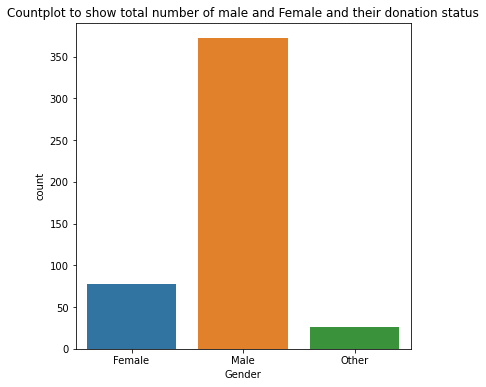

In [174]:
#Countplot to show total number of male and Female and other
fig,axes=plt.subplots(figsize=(6,6))
plt.title("Countplot to show total number of male and Female and their donation status")
sns.countplot(x='Gender',data= users)

<AxesSubplot:title={'center':'Countplot to show total number of male and Female and their donation status'}, xlabel='Gender', ylabel='count'>

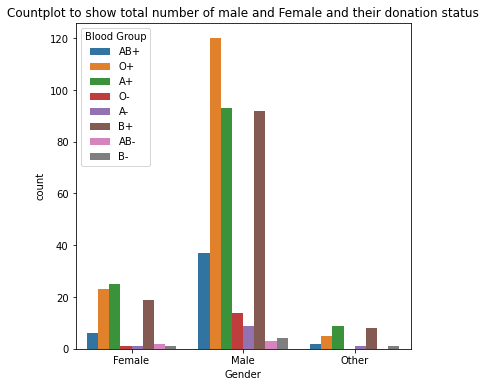

In [175]:
#Countplot to show total number of male and Female and other
fig,axes=plt.subplots(figsize=(6,6))
plt.title("Countplot to show total number of male and Female and their donation status")
sns.countplot(x='Gender',data= users, hue='Blood Group')

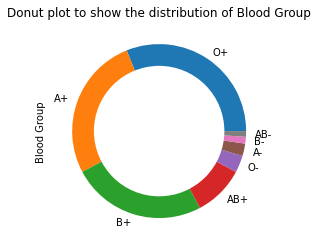

In [176]:
#Donot plot to show the distribution distribution of Blood Group
from matplotlib.patches import Circle
fig,ax=plt.subplots()
mjob=users['Blood Group'].value_counts()
mjob.plot.pie()
ax.set_aspect('equal')
ax.set_title('Donut plot to show the distribution of Blood Group')
circle=Circle((0,0),0.75, facecolor="white")
ax.add_artist(circle)

<AxesSubplot:title={'center':'Countplot to show relationship Blood Group and Donation Status'}, xlabel='Blood Group', ylabel='count'>

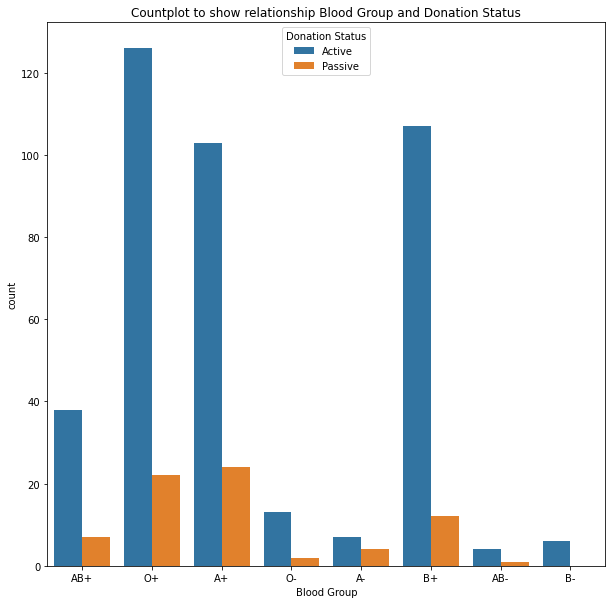

In [177]:
#Countplot to show relationship between going out with friends and Weekend alchol consumption
fig,axes=plt.subplots(figsize=(10,10))
plt.title("Countplot to show relationship Blood Group and Donation Status")
sns.countplot(x='Blood Group',data=users,hue='Donation Status')

C:\Users\drmsa\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\drmsa\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\drmsa\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:title={'center':'Swarmplot to show relationship between blood group, age and gender'}, xlabel='Blood Group', ylabel='Age'>

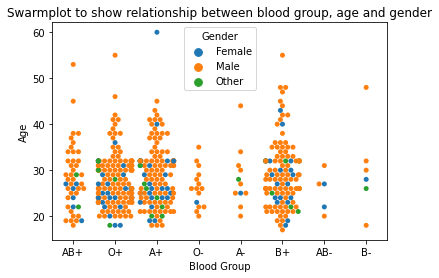

In [178]:
#Swarmplot to show relationship between blood group, age and gender
plt.title("Swarmplot to show relationship between blood group, age and gender") #naming the swarm plot
sns.swarmplot(x='Blood Group',y='Age',data=users, hue='Gender')

# Eastern Development Region Analysis

In [179]:
eastern_district= users[users['City'].str.startswith(("llam","Jhapa","Taplegunj","Panchthar","Bhojpur","Morang","Sunsari","Terhathum","Sankhuwasabha","Dhankuta","Solukhumbu","Khotang","Okhaldunga","Udayapur","Siraha","Saptari"))]
eastern_district

,Name,Blood Group,City,Gender,Donation Status,Date of Birth,Age
380,Alish Tiwari,A+,Jhapa,Male,Active,1996-08-16,25
444,Ananta Raj Khanal,A+,Jhapa,Other,Active,1994-09-14,27
433,Anil Chauhan,A+,Morang,Other,Active,2001-06-20,20
188,Anish Jha,B+,Siraha,Male,Active,2000-01-22,22
88,Anup Niroula,A+,Jhapa,Other,Passive,1999-09-01,22
...,...,...,...,...,...,...,...
343,Uttam Prasad Pakuwal,B+,Jhapa,Male,Active,1987-03-21,35
283,bigyan Raj Paudel,A+,Jhapa,Male,Active,1977-03-12,45
80,mukunda Gadtoula,O+,Morang,Male,Active,1990-01-05,32
315,pooja limbu,O+,Jhapa,Female,Active,1995-10-12,26


<AxesSubplot:title={'center':'Strip plot to analyze'}, xlabel='City', ylabel='Age'>

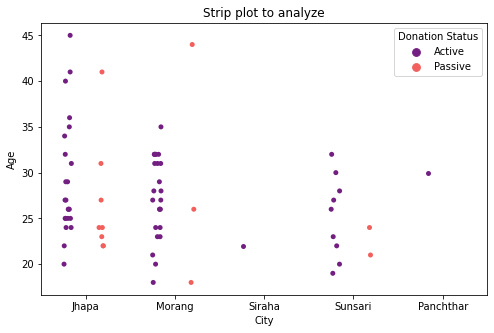

In [180]:
#Strip plot to analyze 
plt.figure(figsize=(8,5))
plt.title("Strip plot to analyze")
sns.stripplot( x='City', y='Age', data = eastern_district, hue='Donation Status',dodge=True, jitter= True, palette ='magma')

<AxesSubplot:title={'center':'Violinplot to show the total number of male, female and other gender in different district of eastern development region on the basis of age'}, xlabel='City', ylabel='Age'>

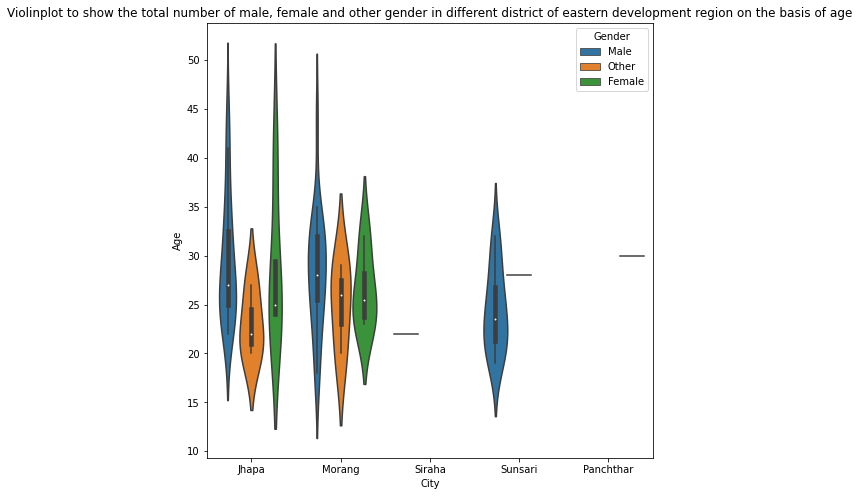

In [181]:
#Violinplot to show the total number of male, female and other gender in different district of eastern development region on the basis of age  
plt.figure(figsize=(8,8))
plt.title("Violinplot to show the total number of male, female and other gender in different district of eastern development region on the basis of age")# naming the title
sns.violinplot(x='City', y='Age', data=eastern_district, hue='Gender')


<AxesSubplot:title={'center':'Countplot to show relationship Blood Group and Donation Status'}, xlabel='City', ylabel='count'>

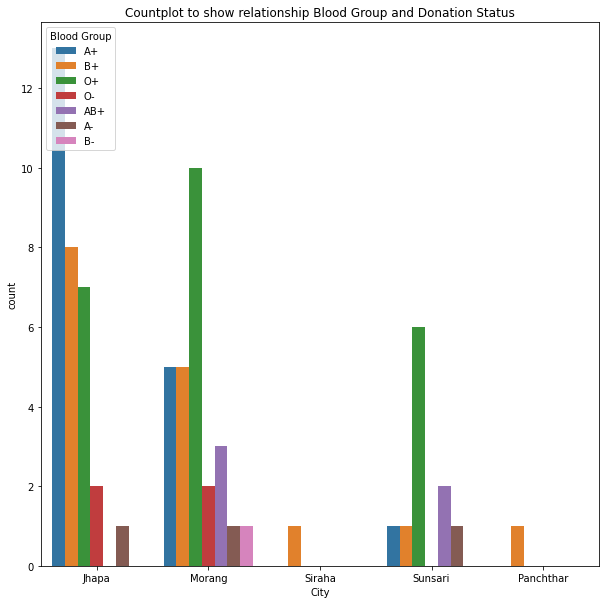

In [182]:
#Countplot to show relationship between going out with friends and Weekend alchol consumption
fig,axes=plt.subplots(figsize=(10,10))
plt.title("Countplot to show relationship Blood Group and Donation Status")
sns.countplot(x='City',data=eastern_district,hue='Blood Group')

# Western Development Analyis

In [183]:
western_district= users[users['City'].str.startswith(("Mustang","Myagdi","Baglung","Gulmi","Argakhanchi","Kapilbastu","Rupandehi","Palpa","Syangja","Parbat","Kaski","Manang","Lamjung","Gorkha","Tanahu","Nawalparasi"))]
western_district

,Name,Blood Group,City,Gender,Donation Status,Date of Birth,Age
245,Ashok Thapa,A+,Rupandehi,Male,Active,1990-10-15,31
124,Baburam B.k,A+,Syangja,Male,Active,1996-06-20,25
368,Bijay Rajali,A+,Rupandehi,Male,Passive,1997-11-24,24
401,GIRIJA SHAHI THAKURI,A+,Rupandehi,Male,Active,1997-07-01,24
385,Min Tiwari,O+,Rupandehi,Male,Active,1986-12-11,35
233,Nitesh Patel,B+,Rupandehi,Male,Active,1998-12-30,23
398,Ramesh Bhandari Sharma,B+,Rupandehi,Male,Active,1987-03-19,35
231,Roshan Ranabhat,AB+,Kaski,Male,Active,2000-04-23,22
399,Sandeep Ghimire,AB+,Rupandehi,Male,Passive,1991-11-29,30
405,Santosh Kharel,A+,Rupandehi,Male,Active,1990-01-01,32


<AxesSubplot:title={'center':'Boxplot to show different age group student and their family relationship and parents current status'}, xlabel='City', ylabel='Age'>

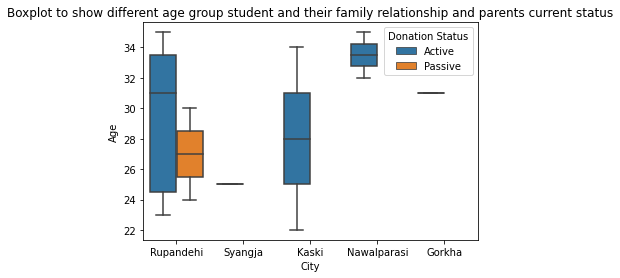

In [184]:
plt.title("Boxplot to show different age group student and their family relationship and parents current status")
sns.boxplot(x='City',y='Age', data=western_district, hue='Donation Status')

Text(0.5, 1.0, 'Line Plot of BloodGroup and Age in Western Region')

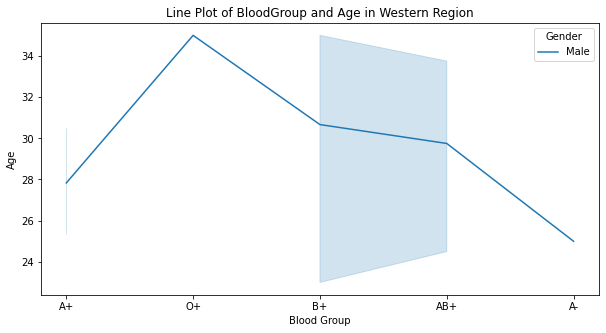

In [185]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Blood Group',y='Age',data= western_district, hue = "Gender")
plt.title("Line Plot of BloodGroup and Age in Western Region")

Text(0.5, 1.0, 'Barplot  to show distribution of age  in different Cities of Western along with age')

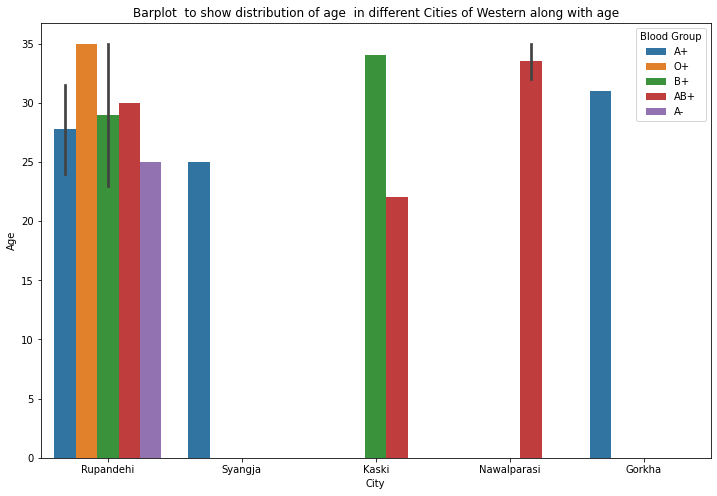

In [186]:
plt.figure(figsize=(12,8))
sns.barplot(x='City', y='Age', data= western_district, hue='Blood Group', dodge=True)
plt.title("Barplot  to show distribution of age  in different Cities of Western along with age")

# Central Development Analysis

In [187]:
central_district = users[users['City'].str.startswith(("Bara","Bhaktapur","Chitwan","Dhading","Dhanusha","Dolakha","Kathmandu", 
                                              "Kavrepalanchok","Lalitpur","Makwanpur","Mahottari","Nuwakot","Parsa","Rasuwa",
                                              "Rautahat","Ramechhap","Sindhupalchok","Sarlahi","Sindhuli"))]
central_district

,Name,Blood Group,City,Gender,Donation Status,Date of Birth,Age
5,Aadarsha Dahal,O+,Kathmandu,Male,Passive,2000-08-31,21
1,Aashish Dahal,O+,Kathmandu,Male,Active,1992-01-02,30
127,Ajay Chaulagain,B+,Kathmandu,Male,Active,2000-06-06,21
276,Amit MaharXan,A+,Kathmandu,Male,Active,1993-06-23,28
174,Ang Tshering Lama,O+,Kathmandu,Female,Active,1986-03-28,36
...,...,...,...,...,...,...,...
263,ashish Tiwari,O+,Chitwan,Male,Active,1994-12-03,27
437,bijaya adhikari,O+,Chitwan,Other,Active,1992-05-01,30
146,dawa lama,O+,Kathmandu,Male,Active,1991-03-24,31
143,ramil,B+,Kathmandu,Male,Active,2000-01-01,22


Text(0.5, 0, 'District')

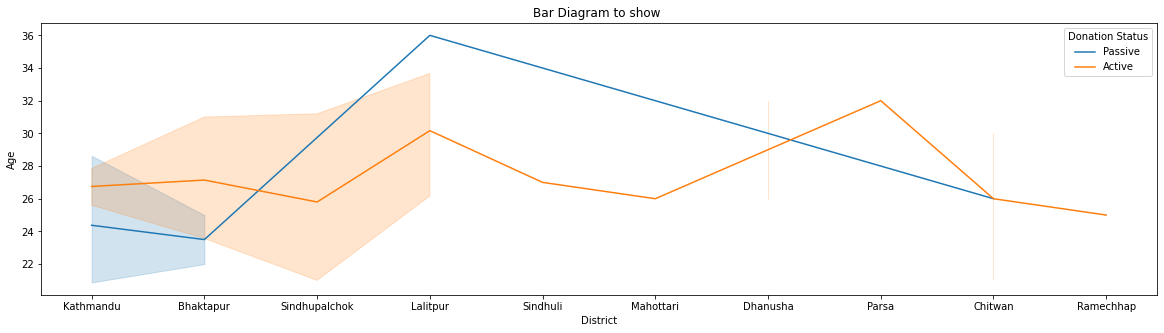

In [188]:
plt.figure(figsize=(20,5))
#plot the point plot
sns.lineplot(x="City", y="Age", data=central_district, hue="Donation Status")
plt.title('Bar Diagram to show ')
plt.xlabel('District')

C:\Users\drmsa\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:title={'center':'Swarm plot to analyze the data related to absences and internet'}, xlabel='City', ylabel='Blood Group'>

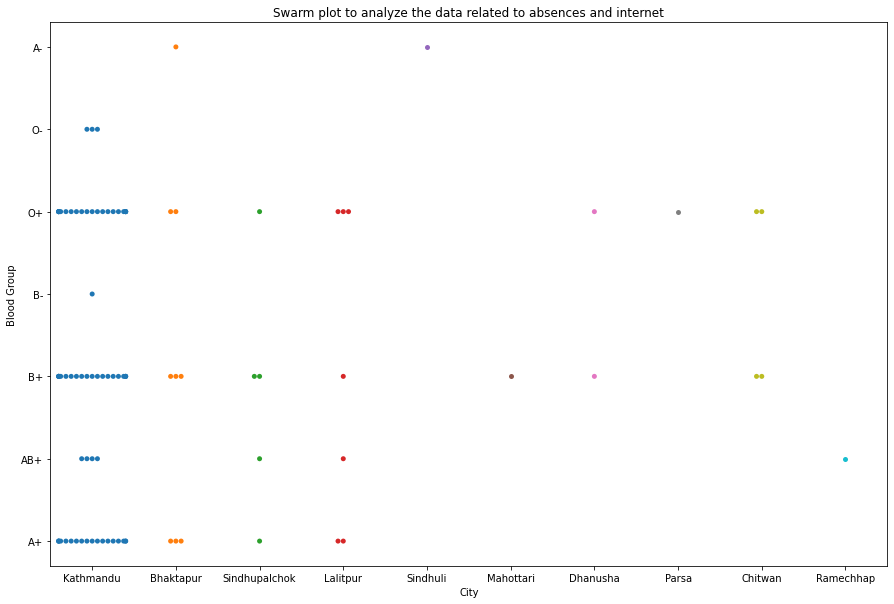

In [189]:
#Swarm plot to analyze the data related to absences and internet
plt.figure(figsize=(15,10))
plt.title("Swarm plot to analyze the data related to absences and internet")
sns.swarmplot( x='City', y='Blood Group', data= central_district)

<AxesSubplot:title={'center':' Countplot to show total number blood group in different district of central development region'}, xlabel='City', ylabel='count'>

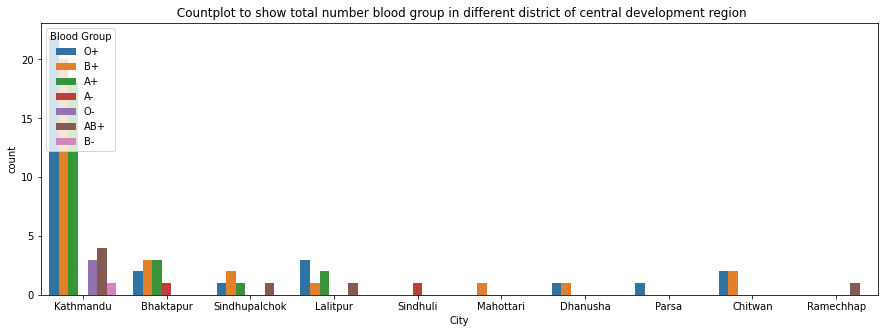

In [190]:
# Countplot to show total number blood group in different district of central development region
fig,axes=plt.subplots(figsize=(15,5))
plt.title(" Countplot to show total number blood group in different district of central development region")
sns.countplot(x='City', data= central_district, hue='Blood Group')

# Mid Western Analysis

In [93]:
mid_western_district = users[users['City'].str.startswith(("Banke","Bardiya","Dolpa","Dailekh","Dang","Humla","Jumla","Jajarkot","Kalikot",
                                                  "Mugu","Pyuthan","Rolpa","Rukum","Salyan","Surkhet"))]
mid_western_district

,Name,Blood Group,City,Gender,Donation Status,Date of Birth,Age
66,KAMAL SUBEDI,A+,Dang,Male,Active,1990-04-11,32
114,PRABIN CHAUDHARY,B+,Dang,Male,Active,1995-11-26,26


# Far Western Analysis

In [94]:
far_western_district= users[users['City'].str.startswith(("Achham","Bajhang","Bajura","Doti","Kailali","Baitadi","Dadeldhura","Darchula","Kanchanpur"))]
far_western_district

,Name,Blood Group,City,Gender,Donation Status,Date of Birth,Age
234,PRITAM GURUNG,AB+,Kanchanpur,Male,Active,1993-09-17,28
136,SHYAM BHAKTA THAPA,B-,Bajura,Male,Active,1992-02-02,30
221,SURESH RAJ JOSHI,A-,Kailali,Male,Passive,2001-09-30,20


<AxesSubplot:title={'center':'Countplot To Show Donation Status Of Different Gender In Central Region'}, xlabel='Donation Status', ylabel='count'>

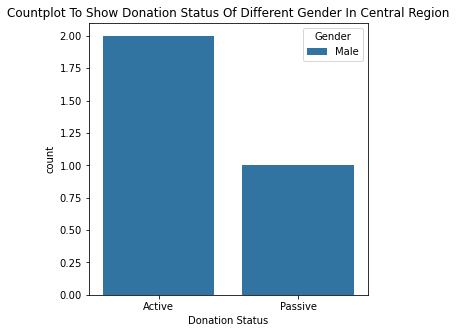

In [95]:
# Countplot to show total number of male and Female and other.
fig,axes=plt.subplots(figsize=(5,5))
plt.title("Countplot To Show Donation Status Of Different Gender In Central Region")
sns.countplot(x='Donation Status', data= far_western_district, hue='Gender')

Text(0.5, 0, 'Development Region')

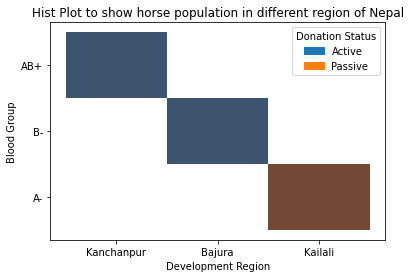

In [96]:
sns.histplot(x="City", y="Blood Group", data= far_western_district , hue="Donation Status")
plt.title('Hist Plot to show horse population in different region of Nepal')
plt.xlabel('Development Region')

Text(0.5, 0, 'District')

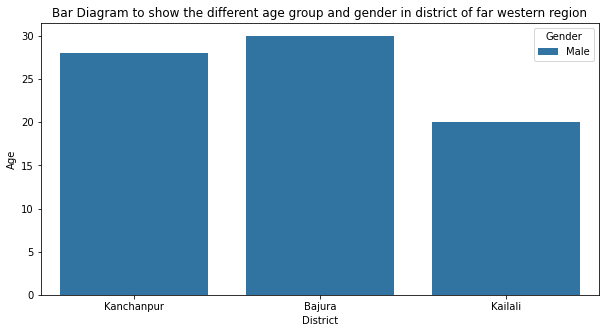

In [97]:
plt.figure(figsize=(10,5))
#plot the point plot
sns.barplot(x="City", y="Age", data=far_western_district, hue="Gender")
plt.title('Bar Diagram to show the different age group and gender in district of far western region')
plt.xlabel('District')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

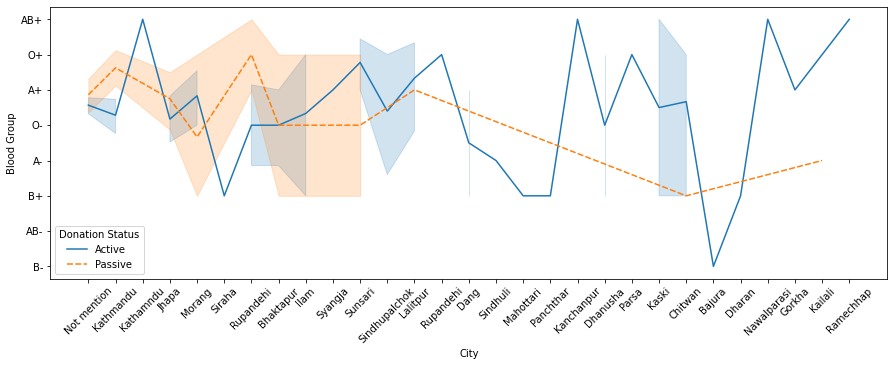

In [98]:
# Setting figure size in the given value.
fig,axes=plt.subplots(figsize=(15,5))

# Line Plot.
sns.lineplot(x = "City", y = "Blood Group", data = users, hue ='Donation Status', style='Donation Status')
plt.xticks(rotation=45)